In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator

In [2]:
control_RF_feature_importance = pd.read_csv("../output/control/RF_feature_importance.csv", header=[0], index_col=0)
KNN_RF_feature_importance = pd.read_csv("../output/data_fill/KNN/RF_feature_importance.csv", header=[0], index_col=0)
control_RF_feature_importance

,sex,age,ear,day of onset,time of onset,vertigo,ear blockage,tinnitus,hypertension,diabetes,...,weight,BMI,mean hearing threshold(affected side),curve type(affected side),mean hearing threshold(contralateral),curve type(contralateral),revive(affected side),ABR,otoacoustic emission (500-6000Hz),target
0,0.007481,0.080163,0.009653,0.092602,0.054130,0.010919,0.010486,0.006251,0.013256,0.009293,...,0.062310,0.071300,0.065575,0.021792,0.054573,0.013452,0.012375,0.006978,0.009732,effective
1,0.009297,0.071917,0.012224,0.126485,0.058620,0.011759,0.009581,0.008973,0.010335,0.007311,...,0.061206,0.064962,0.051971,0.018626,0.050966,0.012080,0.013199,0.009779,0.013501,effective
2,0.009873,0.062721,0.009046,0.110776,0.062334,0.010205,0.010784,0.008196,0.007910,0.006731,...,0.056616,0.065005,0.061096,0.016943,0.062892,0.013673,0.010920,0.009568,0.015945,effective
3,0.008968,0.075539,0.014350,0.109038,0.056660,0.008502,0.009559,0.007794,0.006497,0.006943,...,0.059492,0.058458,0.066957,0.018617,0.064843,0.012218,0.010573,0.008733,0.012858,effective
4,0.006714,0.069503,0.009919,0.098783,0.053627,0.011614,0.009933,0.007523,0.011671,0.007895,...,0.059406,0.073357,0.067369,0.016663,0.068057,0.015545,0.006867,0.010508,0.011602,effective
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.009637,0.066111,0.010692,0.087523,0.037907,0.011452,0.013092,0.006080,0.006860,0.004737,...,0.054515,0.063503,0.088143,0.032663,0.049675,0.013267,0.010496,0.026162,0.050224,all
46,0.008057,0.080770,0.011855,0.074745,0.036341,0.011354,0.011457,0.005522,0.008219,0.005276,...,0.060927,0.056343,0.088392,0.042141,0.063427,0.014375,0.011025,0.030633,0.036513,all
47,0.011085,0.068213,0.012796,0.073592,0.038715,0.012582,0.011273,0.005688,0.006462,0.008714,...,0.051719,0.065782,0.088985,0.046129,0.056675,0.014356,0.009509,0.023882,0.057935,all
48,0.011530,0.066803,0.011522,0.080583,0.040643,0.010092,0.012766,0.005916,0.007370,0.005628,...,0.053298,0.064367,0.093775,0.029952,0.057817,0.015115,0.011371,0.025404,0.031085,all


In [3]:
def boxplot(data, x=None, y=None, hue=None, pairs=None, xlabel=None, ylabel=None, xticklabels=None, output_path: str = None, figsize: tuple = (24, 12)):
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=figsize)

    ax = sns.boxplot(data=data, x=x, y=y, hue=hue)

    if pairs:
        annotator = Annotator(ax, pairs, data=data, x=x, y=y, hue=hue)
        annotator.configure(test="Mann-Whitney", text_format="star")
        annotator.apply_and_annotate()

    plt.legend()
    plt.grid(False)

    if xlabel is not None:
        plt.xlabel(xlabel)
        plt.xticks(rotation=90)
    if ylabel is not None:
        plt.ylabel(ylabel)
    if xticklabels:
        ax.set_xticklabels(labels=xticklabels)

    if output_path:
        plt.savefig(output_path, bbox_inches="tight")
    plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

curve type(affected side)_cured vs. curve type(affected side)_all: Mann-Whitney-Wilcoxon test two-sided, P_val:1.669e-13 U_stat=2.320e+03
ABR_cured vs. ABR_all: Mann-Whitney-Wilcoxon test two-sided, P_val:1.075e-17 U_stat=2.493e+03
otoacoustic emission (500-6000Hz)_cured vs. otoacoustic emission (500-6000Hz)_all: Mann-Whitney-Wilcoxon test two-sided, P_val:7.066e-18 U_stat=2.500e+03
day of onset_cured vs. day of onset_all: Mann-Whitney-Wilcoxon test two-sided, P_val:5.971e-16 U_stat=7.600e+01
time of onset_markedly effective vs. time of onset_cured: Mann-Whitney-Wilcoxon test two-sided, P_val:1.952e-17 U_stat=2.483e+03
age_cured vs. age_all: Mann-Whitney-Wilcoxon test two-sided, P_val:3.393e-11 U_stat=2.212e+03
age_markedly effective vs. age_cured: Mann-Whitney-Wilcoxon test two-sided, P_val:2.562

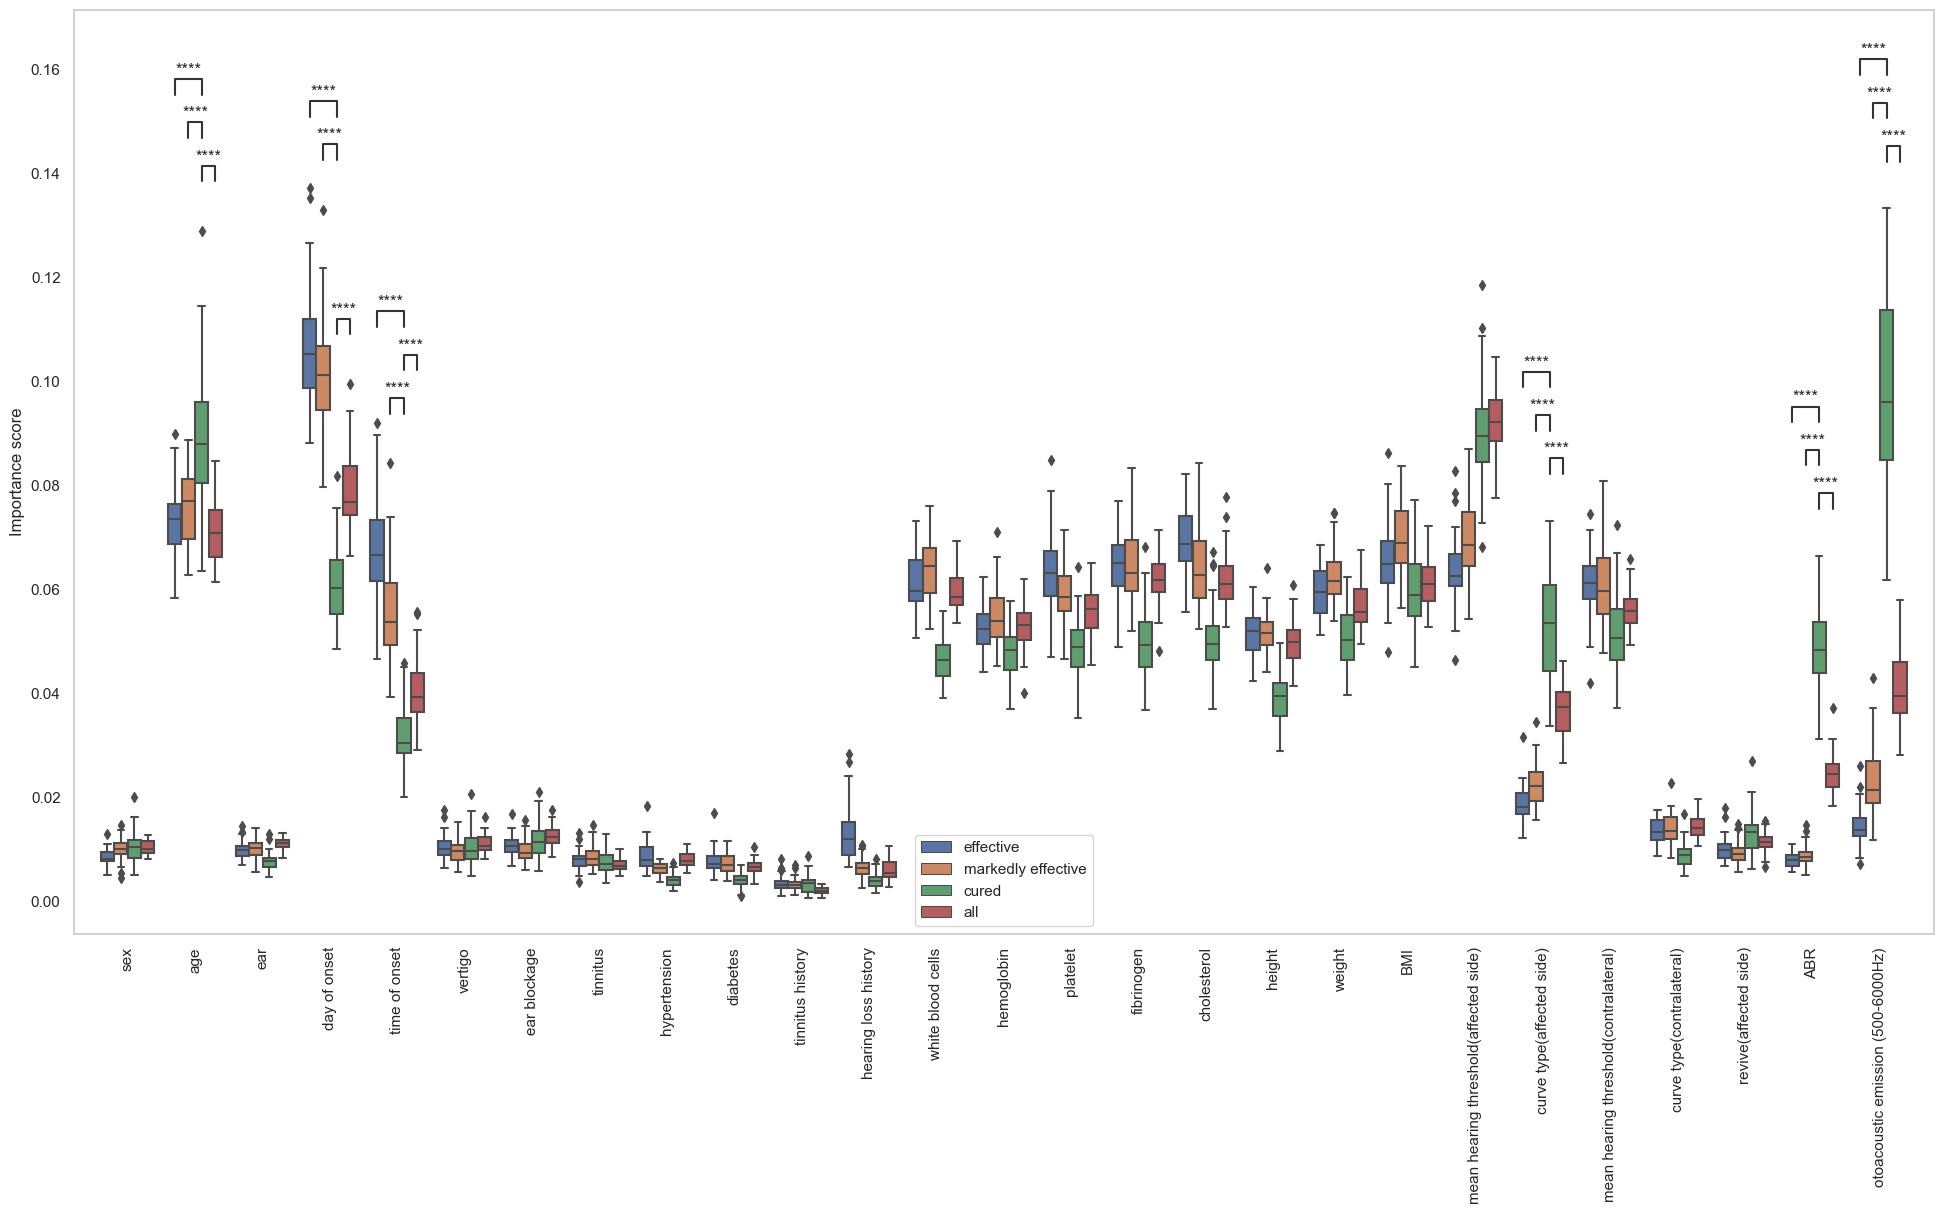

In [4]:
boxplot(
    pd.melt(control_RF_feature_importance, value_vars=control_RF_feature_importance.reset_index().columns.drop(["index", "target"]), id_vars=["target"]),
    x="variable",
    y="value",
    hue="target",
    pairs=[
        (("age", "cured"), ("age", "effective")),
        (("age", "cured"), ("age", "markedly effective")),
        (("age", "cured"), ("age", "all")),

        (("day of onset", "cured"), ("day of onset", "effective")),
        (("day of onset", "cured"), ("day of onset", "markedly effective")),
        (("day of onset", "cured"), ("day of onset", "all")),

        (("time of onset", "cured"), ("time of onset", "effective")),
        (("time of onset", "cured"), ("time of onset", "markedly effective")),
        (("time of onset", "cured"), ("time of onset", "all")),

        (("curve type(affected side)", "cured"), ("curve type(affected side)", "effective")),
        (("curve type(affected side)", "cured"), ("curve type(affected side)", "markedly effective")),
        (("curve type(affected side)", "cured"), ("curve type(affected side)", "all")),

        (("ABR", "cured"), ("ABR", "effective")),
        (("ABR", "cured"), ("ABR", "markedly effective")),
        (("ABR", "cured"), ("ABR", "all")),

        (("otoacoustic emission (500-6000Hz)", "cured"), ("otoacoustic emission (500-6000Hz)", "effective")),
        (("otoacoustic emission (500-6000Hz)", "cured"), ("otoacoustic emission (500-6000Hz)", "markedly effective")),
        (("otoacoustic emission (500-6000Hz)", "cured"), ("otoacoustic emission (500-6000Hz)", "all")),
    ],
    xlabel="",
    ylabel="Importance score",
    output_path="../output/control/RF_feature_importance.pdf",
)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mean hearing threshold(affected side)_cured vs. mean hearing threshold(affected side)_all: Mann-Whitney-Wilcoxon test two-sided, P_val:9.913e-09 U_stat=2.082e+03
curve type(affected side)_cured vs. curve type(affected side)_all: Mann-Whitney-Wilcoxon test two-sided, P_val:7.642e-14 U_stat=2.335e+03
ABR_cured vs. ABR_all: Mann-Whitney-Wilcoxon test two-sided, P_val:7.969e-18 U_stat=2.498e+03
otoacoustic emission (500-6000Hz)_cured vs. otoacoustic emission (500-6000Hz)_all: Mann-Whitney-Wilcoxon test two-sided, P_val:7.066e-18 U_stat=2.500e+03
day of onset_cured vs. day of onset_all: Mann-Whitney-Wilcoxon test two-sided, P_val:7.075e-16 U_stat=7.900e+01
time of onset_markedly effective vs. time of onset_cured: Mann-Whitney-Wilcoxon test two-sided, P_val:1.839e-17 U_stat=2.484e+03
day of onset_marked

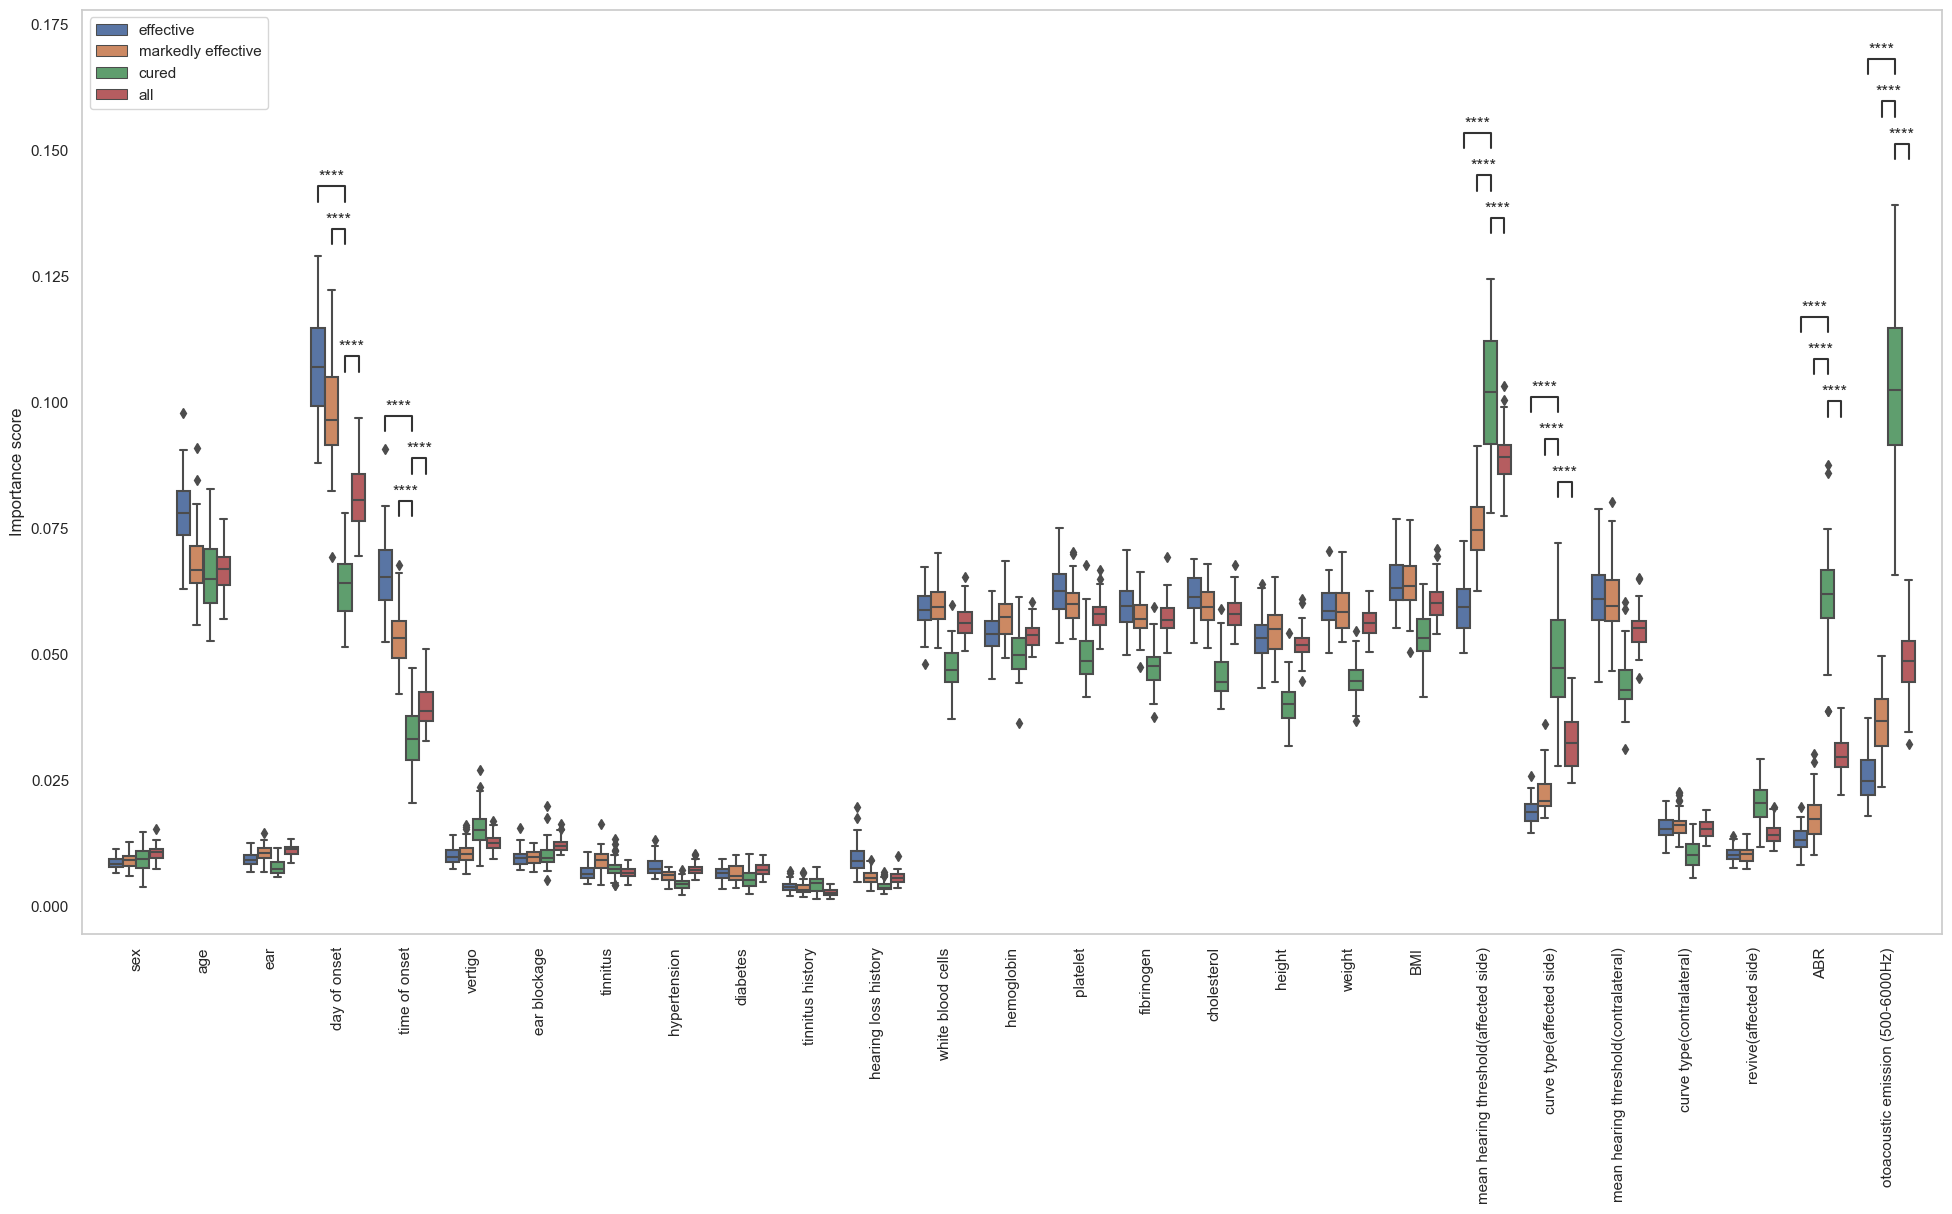

In [5]:
boxplot(
    pd.melt(KNN_RF_feature_importance, value_vars=KNN_RF_feature_importance.reset_index().columns.drop(["index", "target"]), id_vars=["target"]),
    x="variable",
    y="value",
    hue="target",
    pairs=[
        (("day of onset", "cured"), ("day of onset", "effective")),
        (("day of onset", "cured"), ("day of onset", "markedly effective")),
        (("day of onset", "cured"), ("day of onset", "all")),

        (("time of onset", "cured"), ("time of onset", "effective")),
        (("time of onset", "cured"), ("time of onset", "markedly effective")),
        (("time of onset", "cured"), ("time of onset", "all")),

        (("mean hearing threshold(affected side)", "cured"), ("mean hearing threshold(affected side)", "effective")),
        (("mean hearing threshold(affected side)", "cured"), ("mean hearing threshold(affected side)", "markedly effective")),
        (("mean hearing threshold(affected side)", "cured"), ("mean hearing threshold(affected side)", "all")),

        (("curve type(affected side)", "cured"), ("curve type(affected side)", "effective")),
        (("curve type(affected side)", "cured"), ("curve type(affected side)", "markedly effective")),
        (("curve type(affected side)", "cured"), ("curve type(affected side)", "all")),

        (("ABR", "cured"), ("ABR", "effective")),
        (("ABR", "cured"), ("ABR", "markedly effective")),
        (("ABR", "cured"), ("ABR", "all")),

        (("otoacoustic emission (500-6000Hz)", "cured"), ("otoacoustic emission (500-6000Hz)", "effective")),
        (("otoacoustic emission (500-6000Hz)", "cured"), ("otoacoustic emission (500-6000Hz)", "markedly effective")),
        (("otoacoustic emission (500-6000Hz)", "cured"), ("otoacoustic emission (500-6000Hz)", "all")),
    ],
    xlabel="",
    ylabel="Importance score",
    output_path="../output/data_fill/KNN/RF_feature_importance.pdf",
)

In [6]:
KNN_RF_feature_importance

,sex,age,ear,day of onset,time of onset,vertigo,ear blockage,tinnitus,hypertension,diabetes,...,weight,BMI,mean hearing threshold(affected side),curve type(affected side),mean hearing threshold(contralateral),curve type(contralateral),revive(affected side),ABR,otoacoustic emission (500-6000Hz),target
0,0.008107,0.077968,0.008291,0.108613,0.062840,0.009272,0.009494,0.006197,0.011662,0.005660,...,0.060942,0.064100,0.059755,0.022304,0.054897,0.016395,0.010414,0.010427,0.019025,effective
1,0.010214,0.071634,0.012561,0.089401,0.058034,0.011219,0.007683,0.008970,0.009423,0.007677,...,0.064498,0.067808,0.064585,0.017440,0.054270,0.015108,0.009471,0.010180,0.023557,effective
2,0.008381,0.078463,0.009417,0.106722,0.061355,0.013140,0.009742,0.004510,0.008351,0.008300,...,0.057018,0.058709,0.060402,0.017691,0.072204,0.015438,0.010911,0.015022,0.025954,effective
3,0.007782,0.075835,0.008190,0.120131,0.075622,0.007734,0.009554,0.004923,0.005813,0.004612,...,0.058055,0.064212,0.050205,0.015673,0.057823,0.014482,0.010514,0.011858,0.026947,effective
4,0.011302,0.074383,0.011806,0.108228,0.068049,0.012062,0.007207,0.005394,0.009080,0.006768,...,0.062533,0.067308,0.063963,0.018351,0.055314,0.011947,0.011224,0.013536,0.021923,effective
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.010773,0.062871,0.009893,0.086148,0.038642,0.011121,0.011983,0.007212,0.006542,0.007429,...,0.055264,0.060122,0.085388,0.024952,0.056869,0.016498,0.011130,0.030688,0.046701,all
46,0.010934,0.067113,0.010655,0.082259,0.039642,0.011190,0.012396,0.005698,0.005174,0.008674,...,0.055524,0.059304,0.088410,0.027541,0.054212,0.017448,0.016939,0.032297,0.044907,all
47,0.010692,0.066107,0.010749,0.088100,0.036339,0.014018,0.012490,0.007393,0.007078,0.006077,...,0.052123,0.062919,0.083143,0.032198,0.049552,0.015366,0.015750,0.029041,0.052913,all
48,0.012542,0.072298,0.011680,0.083464,0.033988,0.011053,0.015038,0.005090,0.006851,0.008152,...,0.058965,0.062910,0.084700,0.031568,0.054726,0.017894,0.015251,0.029525,0.046427,all


In [7]:
for target in KNN_RF_feature_importance["target"].unique():
    KNN_RF_feature_importance[KNN_RF_feature_importance["target"] == target]
    print(target)

effective
markedly effective
cured
all


In [8]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from SSNHL.util import load_data, train_model

In [9]:
def calculate(X, y):
    n_class = np.unique(y).size

    functions = [
        RandomForestClassifier,
    ]
    results, rocs = dict(), dict()
    for function in functions:
        accuracy, roc = [], [[], [], []]
        for random_state in range(1, 51):
            clf = function(n_estimators=100, random_state=random_state)

            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=random_state
            )
            _accuracy, _roc = train_model(
                clf, X_train, y_train, X_test, y_test, n_class
            )

            accuracy.append(_accuracy)
            roc[0].append(_roc[0].tolist())
            roc[1].append(_roc[1].tolist())
            roc[2].append(_roc[2])

        results[clf.__class__.__name__] = accuracy
        rocs[clf.__class__.__name__] = roc

    return results, rocs

In [30]:
target_maps = {
    "effective": {0: 0, 1: 1, 2: 1, 3: 1},
    "markedly effective": {0: 0, 1: 0, 2: 1, 3: 1},
    "cured": {0: 0, 1: 0, 2: 0, 3: 1},
    "all": {0: 0, 1: 1, 2: 2, 3: 3},
}

def run(data_path, ignore_order, target_map, preprocess_func):
    X, y, filter_data = load_data(data_path, preprocess_func)

    _y = y.copy()
    for origin_class in target_map:
        _y[_y == origin_class] = target_map[origin_class]

    results = dict(accs=dict(), aucs=dict())
    for i in range(len(ignore_order)):
        column_names = ignore_order[:i]
        column_ids = [filter_data.columns.get_loc(col) for col in column_names]
        _X = np.delete(X, column_ids, axis=1)

        accs, rocs = calculate(_X, _y)
        results["accs"][i] = accs["RandomForestClassifier"]
        results["aucs"][i] = rocs["RandomForestClassifier"][2]
    
    for key in results.keys():
        _df = pd.DataFrame(results[key])
        _df = pd.melt(_df, value_vars=_df.columns)
        _df = _df.rename(columns={"variable": "Number of deleted features", "value": key})
        results[key] = _df

    return results

def pointplot(data, x=None, y=None, hue=None, xticklabels=None, output_path: str = None, figsize: tuple = (24, 12)):
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=figsize)

    ax = sns.pointplot(data=data, x=x, y=y, hue=hue, markers=["."], capsize=0.2)

    if hue:
        plt.legend(loc='lower right')
    plt.grid(False)

    if x:
        plt.xlabel(x)
    if y:
        plt.ylabel(y)
    if xticklabels:
        ax.set_xticklabels(labels=xticklabels)

    if output_path:
        plt.savefig(output_path, bbox_inches="tight")
    plt.show()


In [11]:
results = {}
for target in target_maps.keys():
    results[target] = run(
        "../raw_data/all.xlsx",
        KNN_RF_feature_importance[KNN_RF_feature_importance["target"] == target].mean().sort_values().index,
        target_maps[target],
        "KNN"
    )

/var/folders/5c/gy4tbw190_j8c83t7cch98pc0000gn/T/ipykernel_19444/383677283.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  KNN_RF_feature_importance[KNN_RF_feature_importance["target"] == target].mean().sort_values().index,


Imputing row 1/600 with 0 missing, elapsed time: 0.050
Imputing row 101/600 with 0 missing, elapsed time: 0.051
Imputing row 201/600 with 1 missing, elapsed time: 0.052
Imputing row 301/600 with 1 missing, elapsed time: 0.053
Imputing row 401/600 with 0 missing, elapsed time: 0.054
Imputing row 501/600 with 0 missing, elapsed time: 0.055


/var/folders/5c/gy4tbw190_j8c83t7cch98pc0000gn/T/ipykernel_19444/383677283.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  KNN_RF_feature_importance[KNN_RF_feature_importance["target"] == target].mean().sort_values().index,


Imputing row 1/600 with 0 missing, elapsed time: 0.049
Imputing row 101/600 with 0 missing, elapsed time: 0.051
Imputing row 201/600 with 1 missing, elapsed time: 0.051
Imputing row 301/600 with 1 missing, elapsed time: 0.052
Imputing row 401/600 with 0 missing, elapsed time: 0.053
Imputing row 501/600 with 0 missing, elapsed time: 0.054


/var/folders/5c/gy4tbw190_j8c83t7cch98pc0000gn/T/ipykernel_19444/383677283.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  KNN_RF_feature_importance[KNN_RF_feature_importance["target"] == target].mean().sort_values().index,


Imputing row 1/600 with 0 missing, elapsed time: 0.049
Imputing row 101/600 with 0 missing, elapsed time: 0.050
Imputing row 201/600 with 1 missing, elapsed time: 0.051
Imputing row 301/600 with 1 missing, elapsed time: 0.052
Imputing row 401/600 with 0 missing, elapsed time: 0.053
Imputing row 501/600 with 0 missing, elapsed time: 0.054


/var/folders/5c/gy4tbw190_j8c83t7cch98pc0000gn/T/ipykernel_19444/383677283.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  KNN_RF_feature_importance[KNN_RF_feature_importance["target"] == target].mean().sort_values().index,


Imputing row 1/600 with 0 missing, elapsed time: 0.048
Imputing row 101/600 with 0 missing, elapsed time: 0.049
Imputing row 201/600 with 1 missing, elapsed time: 0.050
Imputing row 301/600 with 1 missing, elapsed time: 0.051
Imputing row 401/600 with 0 missing, elapsed time: 0.051
Imputing row 501/600 with 0 missing, elapsed time: 0.052


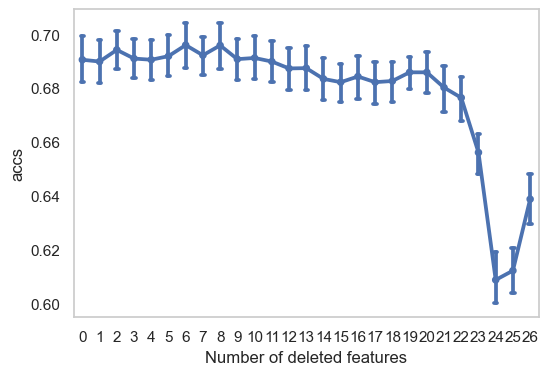

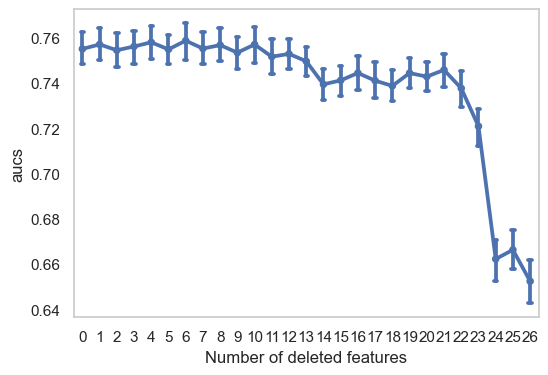

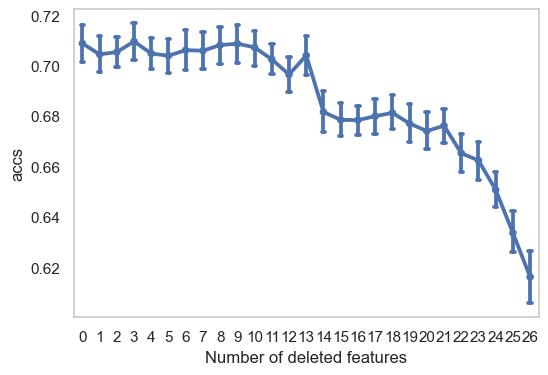

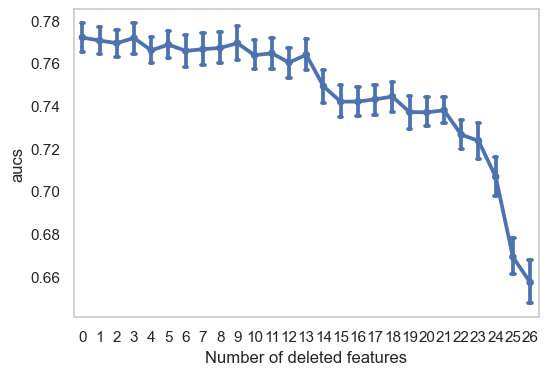

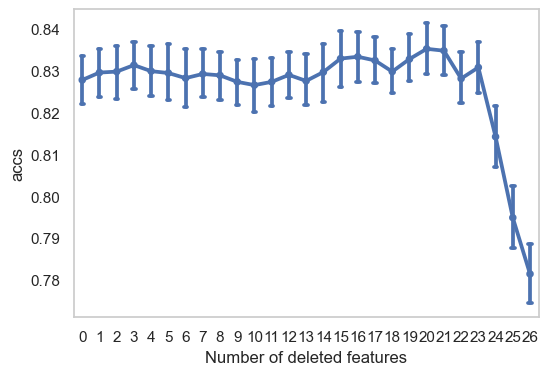

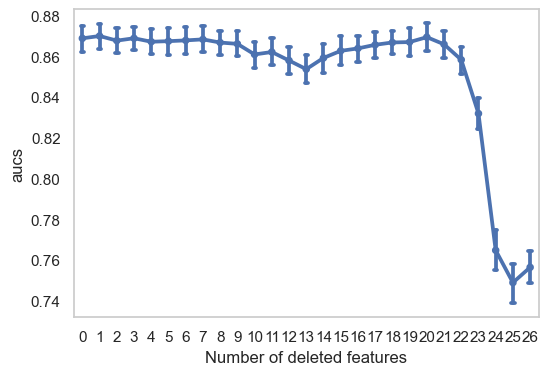

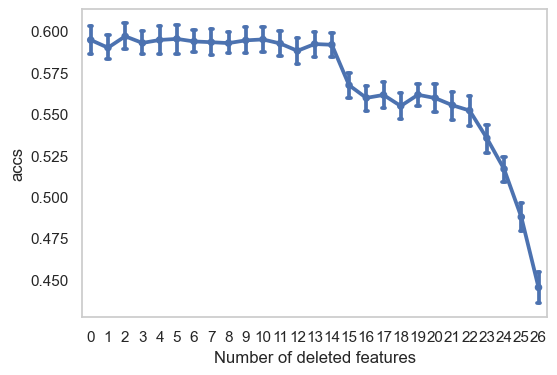

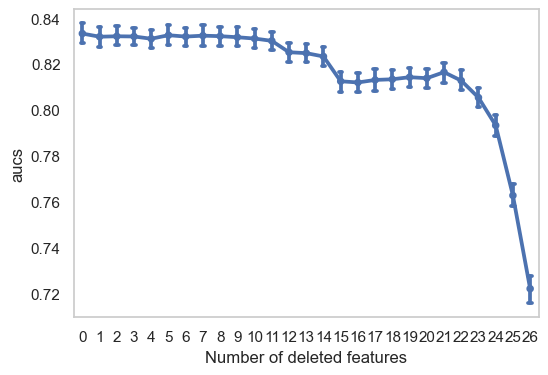

In [31]:
for target in target_maps.keys():
    pointplot(
        data = results[target]["accs"],
        x = "Number of deleted features",
        y = "accs",
        output_path = "../output/data_fill/KNN/RF_feature_importance_{}_acc.pdf".format(target),
        figsize = (6, 4)
    )
    pointplot(
        data = results[target]["aucs"],
        x = "Number of deleted features",
        y = "aucs",
        output_path = "../output/data_fill/KNN/RF_feature_importance_{}_auc.pdf".format(target),
        figsize = (6, 4)
    )